In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import confusion_matrix,classification_report            

In [48]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [49]:
xyz=pd.read_table("G:\data analytics\datasets\Python Project - Bank Lending\XYZCorp_LendingData.txt")

C:\Users\win\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
xyz.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [51]:
xyz.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969,855969.000000,855969.000000,855969,855969,806526,812908,855969,8.559690e+05,855969,855969,855969,121812,855969,855936,855969,855969,855969.000000,855969.000000,855969,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,847107,855969.000000,602998,855919,855913.000000,213139.000000,855969.0,855969,442.000000,440.000000,442,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,290912,11,6,NaN,3,103,2,120335,14,60991,931,51,NaN,NaN,697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,NaN,3,102,NaN,NaN,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Source Verified,Oct-2015,n,,debt_consolidation,Debt consolidation,945xx,CA,NaN,NaN,Aug-2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan-2016,NaN,Feb-2016,Jan-2016,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,Not Verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,600221,NaN,NaN,247998,54958,12965,282090,429106,NaN,318178,48212,855964,231,505392,398089,9466,125172,NaN,NaN,6433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467510,NaN,534094,701687,NaN,NaN,NaN,855527,NaN,NaN,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,NaN,13.192320,436.238072,NaN,NaN,NaN,NaN,NaN,7.507119e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.122165,0.311621,NaN,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,NaN,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,NaN,2225.985295,NaN,NaN,0.014230,44.101450,1.0,NaN,107412.163982,18.318477,NaN,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,NaN,4.368365,243.726876,NaN,NaN,NaN,NaN,NaN,6.426447e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.423629,0.857189,NaN,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,NaN,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,NaN,4864.966593,NaN,NaN,0.133712,22.164907,0.0,NaN,47987.608637,7.221855,NaN,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.4

In [52]:
np.unique(xyz.policy_code)

array([1.])

In [53]:
xyz=xyz.drop('policy_code',axis=1)

In [54]:
(xyz.isnull().sum()/xyz.shape[0]*100).sort_values(ascending=False)

dti_joint                      99.948596
verification_status_joint      99.948363
annual_inc_joint               99.948363
il_util                        98.643759
mths_since_rcnt_il             98.488964
total_bal_il                   98.447607
inq_last_12m                   98.447607
open_acc_6m                    98.447607
open_il_6m                     98.447607
open_il_24m                    98.447607
open_il_12m                    98.447607
open_rv_12m                    98.447607
open_rv_24m                    98.447607
max_bal_bc                     98.447607
all_util                       98.447607
inq_fi                         98.447607
total_cu_tl                    98.447607
desc                           85.769111
mths_since_last_record         84.674211
mths_since_last_major_derog    75.099682
mths_since_last_delinq         51.381767
next_pymnt_d                   29.553757
tot_cur_bal                     7.863953
tot_coll_amt                    7.863953
total_rev_hi_lim

In [55]:
#dropping columns with more than 75% NAs
xyz2=xyz.drop(['dti_joint','verification_status_joint','annual_inc_joint','il_util','mths_since_rcnt_il','total_bal_il','inq_last_12m',
               'open_acc_6m','open_il_6m','open_il_24m','open_il_12m','open_rv_12m','open_rv_24m','max_bal_bc','all_util',
               'inq_fi','total_cu_tl','desc','mths_since_last_record','mths_since_last_major_derog'],axis=1)

In [56]:
##describing columns only with Na's
xyz2.loc[:,xyz2.columns[xyz2.isna().any()]].describe(include='all')

,emp_title,emp_length,title,mths_since_last_delinq,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,806526,812908,855936,416157.000000,855523.000000,847107,602998,855919,855913.000000,7.886560e+05,7.886560e+05,7.886560e+05
unique,290912,11,60991,NaN,NaN,97,3,102,NaN,NaN,NaN,NaN
top,Teacher,10+ years,Debt consolidation,NaN,NaN,Jan-2016,Feb-2016,Jan-2016,NaN,NaN,NaN,NaN
freq,12965,282090,398089,NaN,NaN,467510,534094,701687,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,34.149943,55.019405,NaN,NaN,NaN,0.014230,2.254129e+02,1.397662e+05,3.216357e+04
std,NaN,NaN,NaN,21.868500,23.811585,NaN,NaN,NaN,0.133712,1.048945e+04,1.539385e+05,3.769964e+04
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,15.000000,37.600000,NaN,NaN,NaN,0.000000,0.000000e+00,2.987000e+04,1.400000e+04
50%,NaN,NaN,NaN,31.000000,55.900000,NaN,NaN,NaN,0.000000,0.000000e+00,8.100850e+04,2.380000e+04
75%,NaN,NaN,NaN,50.000000,73.500000,NaN,NaN,NaN,0.000000,0.000000e+00,2.087032e+05,3.990000e+04


In [57]:
xyz2.emp_title=xyz2.emp_title.fillna('Teacher')
xyz2.emp_length=xyz2.emp_length.fillna('10+ years')
xyz2.title=xyz2.title.fillna('Debt consolidation')
xyz2.mths_since_last_delinq=xyz2.mths_since_last_delinq.fillna(34)
xyz2.revol_util=xyz2.revol_util.fillna(55)
xyz2.last_pymnt_d=xyz2.last_pymnt_d.fillna('Jan-2016')
xyz2.next_pymnt_d=xyz2.next_pymnt_d.fillna('Feb-2016')
xyz2.last_credit_pull_d=xyz2.last_credit_pull_d.fillna('Jan-2016')
xyz2.collections_12_mths_ex_med=xyz2.collections_12_mths_ex_med.fillna(0)
xyz2.tot_coll_amt=xyz2.tot_coll_amt.fillna(0)
xyz2.tot_cur_bal=xyz2.tot_cur_bal.fillna(xyz2.tot_cur_bal.mean())
xyz2.total_rev_hi_lim=xyz2.total_rev_hi_lim.fillna(xyz2.total_rev_hi_lim.mean())
xyz2.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_

In [58]:
xyz2.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969
unique,2,7,35,290912,11,6,3,103,2,14,60991,931,51,697,2,97,3,102,2
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,n,debt_consolidation,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL
freq,600221,247998,54958,62408,325151,429106,318178,48212,855964,505392,398122,9466,125172,6433,442555,476372,787065,701737,855527


In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [60]:
xyz2.grade=le.fit_transform(xyz2.grade)
xyz2.sub_grade=le.fit_transform(xyz2.sub_grade)
xyz2=pd.get_dummies(xyz2,columns=['term','home_ownership','verification_status','purpose','initial_list_status'])


In [61]:
xyz2=xyz2.drop(['application_type','pymnt_plan'],axis=1)    ##since categories are in the ratio 0.99:1
xyz2.describe(include='object')

,emp_title,emp_length,issue_d,title,zip_code,addr_state,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969
unique,290912,11,103,60991,931,51,697,97,3,102
top,Teacher,10+ years,Oct-2015,Debt consolidation,945xx,CA,Aug-2001,Jan-2016,Feb-2016,Jan-2016
freq,62408,325151,48212,398122,9466,125172,6433,476372,787065,701737


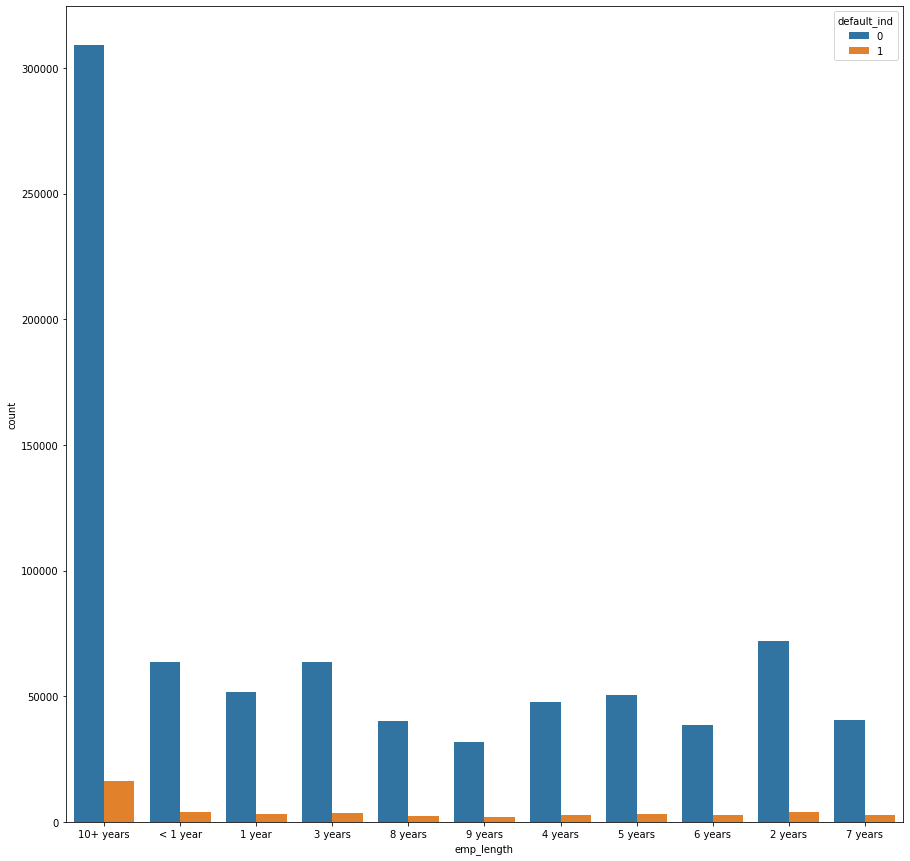

In [62]:
plt.figure(figsize=(15,15))
sns.countplot(xyz2.emp_length,hue=xyz2.default_ind)

In [63]:
print(xyz2.groupby('emp_length').default_ind.value_counts(sum))
##it can be observe that for each category in emp_length, the chances of default are approx 5%..
##that means this category does not make much difference in predicting default_ind

xyz2=xyz2.drop('emp_length',axis=1)

emp_length  default_ind
1 year      0              0.944235
            1              0.055765
10+ years   0              0.950472
            1              0.049528
2 years     0              0.945793
            1              0.054207
3 years     0              0.946017
            1              0.053983
4 years     0              0.943901
            1              0.056099
5 years     0              0.939047
            1              0.060953
6 years     0              0.933456
            1              0.066544
7 years     0              0.938131
            1              0.061869
8 years     0              0.947502
            1              0.052498
9 years     0              0.945431
            1              0.054569
< 1 year    0              0.941684
            1              0.058316
Name: default_ind, dtype: float64


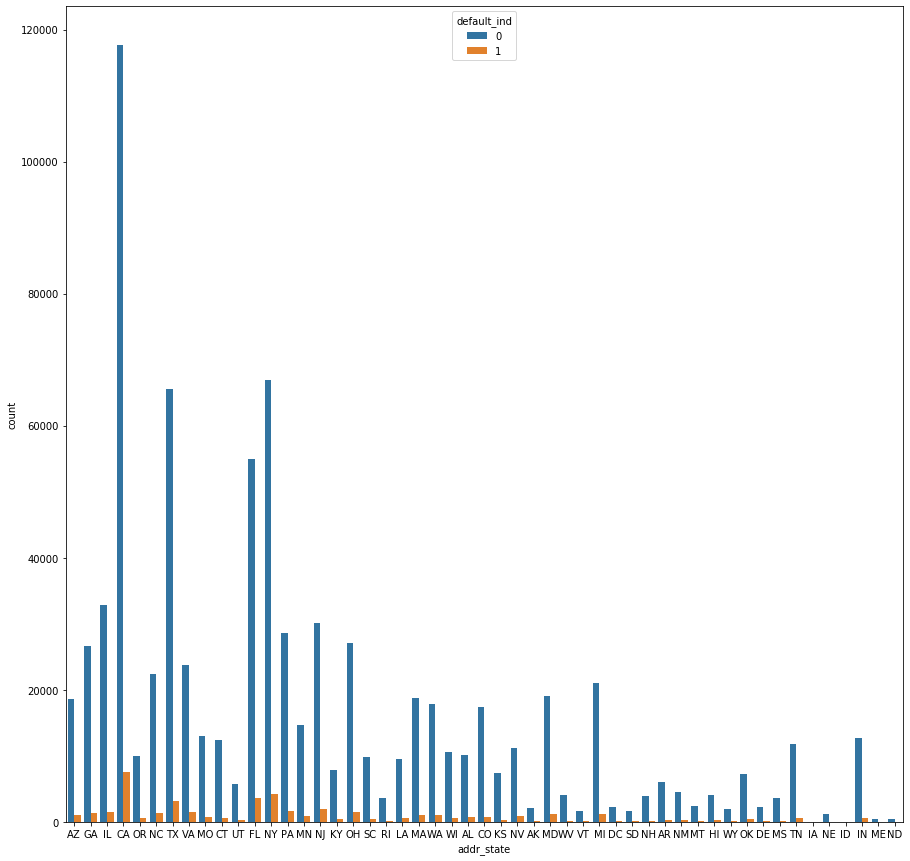

In [64]:
plt.figure(figsize=(15,15))
sns.countplot(xyz2.addr_state,hue=xyz2.default_ind)

In [65]:
xyz2.groupby('addr_state').default_ind.value_counts(sum)

addr_state  default_ind
AK          0              0.954077
            1              0.045923
AL          0              0.937477
            1              0.062523
AR          0              0.946085
            1              0.053915
AZ          0              0.944752
            1              0.055248
CA          0              0.939739
            1              0.060261
CO          0              0.955576
            1              0.044424
CT          0              0.952308
            1              0.047692
DC          0              0.962636
            1              0.037364
DE          0              0.947544
            1              0.052456
FL          0              0.938283
            1              0.061717
GA          0              0.950219
            1              0.049781
HI          0              0.935160
            1              0.064840
IA          0              0.857143
            1              0.142857
ID          0              0.888889
    

In [66]:
xyz2.addr_state=le.fit_transform(xyz2.addr_state)

In [67]:
xyz2.describe(include='object')

,emp_title,issue_d,title,zip_code,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,855969,855969,855969,855969,855969,855969,855969,855969
unique,290912,103,60991,931,697,97,3,102
top,Teacher,Oct-2015,Debt consolidation,945xx,Aug-2001,Jan-2016,Feb-2016,Jan-2016
freq,62408,48212,398122,9466,6433,476372,787065,701737


In [68]:
xyz.purpose.value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

In [69]:
xyz[xyz.purpose=='house'].title.value_counts()
##title is just detail explaination of purpose of the loan..so we can delete these column

Home buying                                                            2215
House Loan                                                               47
Home Improvement                                                         46
Home Down Payment                                                        32
Home                                                                     23
home improvement                                                         22
Home Loan                                                                20
Home Improvement Loan                                                    18
Home Purchase                                                            17
home loan                                                                15
House                                                                    14
Personal Loan                                                            14
home down payment                                                        11
Loan        

In [70]:
xyz2.emp_title=le.fit_transform(xyz2.emp_title)
xyz2=xyz2.drop('title',axis=1)

In [71]:
xyz2=xyz2.drop('zip_code',axis=1)

In [72]:
xyz2.next_pymnt_d=pd.to_datetime(xyz2.next_pymnt_d)
xyz2.earliest_cr_line=pd.to_datetime(xyz2.earliest_cr_line)
xyz2.last_pymnt_d=pd.to_datetime(xyz2.last_pymnt_d)
xyz2.last_credit_pull_d=pd.to_datetime(xyz2.last_credit_pull_d)

In [73]:
xyz2.next_pymnt_d=le.fit_transform(xyz2.next_pymnt_d)
xyz2.earliest_cr_line=le.fit_transform(xyz2.earliest_cr_line)
xyz2.last_pymnt_d=le.fit_transform(xyz2.last_pymnt_d)
xyz2.last_credit_pull_d=le.fit_transform(xyz2.last_credit_pull_d)

In [74]:
np.unique(xyz2.issue_d)

array(['Apr-2008', 'Apr-2009', 'Apr-2010', 'Apr-2011', 'Apr-2012',
       'Apr-2013', 'Apr-2014', 'Apr-2015', 'Aug-2007', 'Aug-2008',
       'Aug-2009', 'Aug-2010', 'Aug-2011', 'Aug-2012', 'Aug-2013',
       'Aug-2014', 'Aug-2015', 'Dec-2007', 'Dec-2008', 'Dec-2009',
       'Dec-2010', 'Dec-2011', 'Dec-2012', 'Dec-2013', 'Dec-2014',
       'Dec-2015', 'Feb-2008', 'Feb-2009', 'Feb-2010', 'Feb-2011',
       'Feb-2012', 'Feb-2013', 'Feb-2014', 'Feb-2015', 'Jan-2008',
       'Jan-2009', 'Jan-2010', 'Jan-2011', 'Jan-2012', 'Jan-2013',
       'Jan-2014', 'Jan-2015', 'Jul-2007', 'Jul-2008', 'Jul-2009',
       'Jul-2010', 'Jul-2011', 'Jul-2012', 'Jul-2013', 'Jul-2014',
       'Jul-2015', 'Jun-2007', 'Jun-2008', 'Jun-2009', 'Jun-2010',
       'Jun-2011', 'Jun-2012', 'Jun-2013', 'Jun-2014', 'Jun-2015',
       'Mar-2008', 'Mar-2009', 'Mar-2010', 'Mar-2011', 'Mar-2012',
       'Mar-2013', 'Mar-2014', 'Mar-2015', 'May-2008', 'May-2009',
       'May-2010', 'May-2011', 'May-2012', 'May-2013', 'May-20

In [75]:
test=xyz2[(xyz2.issue_d=='Jun-2015')|(xyz2.issue_d=='Jul-2015')|(xyz2.issue_d=='Aug-2015')|(xyz2.issue_d=='Sep-2015')
              |(xyz2.issue_d=='Oct-2015')|(xyz2.issue_d=='Nov-2015')|(xyz2.issue_d=='Dec-2015')]
test.shape

(256991, 69)

In [76]:
train=xyz2[-((xyz2.issue_d=='Jun-2015')|(xyz2.issue_d=='Jul-2015')|(xyz2.issue_d=='Aug-2015')|(xyz2.issue_d=='Sep-2015')
              |(xyz2.issue_d=='Oct-2015')|(xyz2.issue_d=='Nov-2015')|(xyz2.issue_d=='Dec-2015'))]
train.shape

(598978, 69)

In [77]:
train=train.drop(['id','member_id','issue_d'],axis=1)
test=test.drop(['id','member_id','issue_d'],axis=1)

In [78]:
y_train=train.default_ind
x_train=train.drop(['default_ind'],axis=1)
x_test=test.drop(['default_ind'],axis=1)
y_test=test.default_ind

In [79]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [80]:
log_model.fit(x_train,y_train)

C:\Users\win\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
confusion_matrix(y_test,log_model.predict(x_test))

array([[256609,     71],
       [    63,    248]], dtype=int64)

In [82]:
print(classification_report(y_test,log_model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.78      0.80      0.79       311

    accuracy                           1.00    256991
   macro avg       0.89      0.90      0.89    256991
weighted avg       1.00      1.00      1.00    256991



In [83]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(min_samples_split=100)

In [84]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
confusion_matrix(y_test,dtree.predict(x_test))

array([[230100,  26580],
       [     3,    308]], dtype=int64)

In [86]:
print(classification_report(y_test,dtree.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    256680
           1       0.01      0.99      0.02       311

    accuracy                           0.90    256991
   macro avg       0.51      0.94      0.48    256991
weighted avg       1.00      0.90      0.94    256991



In [87]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50)

In [88]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
confusion_matrix(y_test,rfc.predict(x_test))

array([[227154,  29526],
       [     1,    310]], dtype=int64)

In [90]:
print(classification_report(y_test,rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    256680
           1       0.01      1.00      0.02       311

    accuracy                           0.89    256991
   macro avg       0.51      0.94      0.48    256991
weighted avg       1.00      0.89      0.94    256991



In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

In [44]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [45]:
confusion_matrix(y_test,knn.predict(x_test))

array([[256525,    155],
       [   170,    141]], dtype=int64)

In [46]:
print(classification_report(y_test,knn.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.48      0.45      0.46       311

    accuracy                           1.00    256991
   macro avg       0.74      0.73      0.73    256991
weighted avg       1.00      1.00      1.00    256991

